In [40]:
import pandas as pd
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()


data = pd.read_csv('../../data/dataset.csv')

# shuffle the DataFrame rows
data = data.sample(frac = 1)
data.head()

s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
best = compare_models(exclude=['gbc'])

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(20009, 206)"
5,Transformed data shape,"(20009, 206)"
6,Transformed train set shape,"(14006, 206)"
7,Transformed test set shape,"(6003, 206)"
8,Numeric features,205
9,Rows with missing values,75.8%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8870,0.9756,0.8870,0.8868,0.8864,0.8302,0.8307,0.3860
rf,Random Forest Classifier,0.8457,0.9521,0.8457,0.8459,0.8444,0.7679,0.7692,0.6940
et,Extra Trees Classifier,0.8155,0.9368,0.8155,0.8157,0.8148,0.7225,0.7232,0.7880
dt,Decision Tree Classifier,0.7738,0.8307,0.7738,0.7740,0.7737,0.6602,0.6604,0.3590
ada,Ada Boost Classifier,0.7736,0.8916,0.7736,0.7816,0.7753,0.6602,0.6622,0.4190
lda,Linear Discriminant Analysis,0.7372,0.8921,0.7372,0.7483,0.7400,0.6057,0.6081,0.3920
ridge,Ridge Classifier,0.6512,0.0000,0.6512,0.6538,0.6473,0.4760,0.4796,0.2800
lr,Logistic Regression,0.4924,0.6755,0.4924,0.4949,0.4901,0.2373,0.2389,0.3240
knn,K Neighbors Classifier,0.4924,0.6802,0.4924,0.4904,0.4885,0.2401,0.2416,0.8490
nb,Naive Bayes,0.4020,0.6067,0.4020,0.4344,0.3645,0.1044,0.1179,0.4260


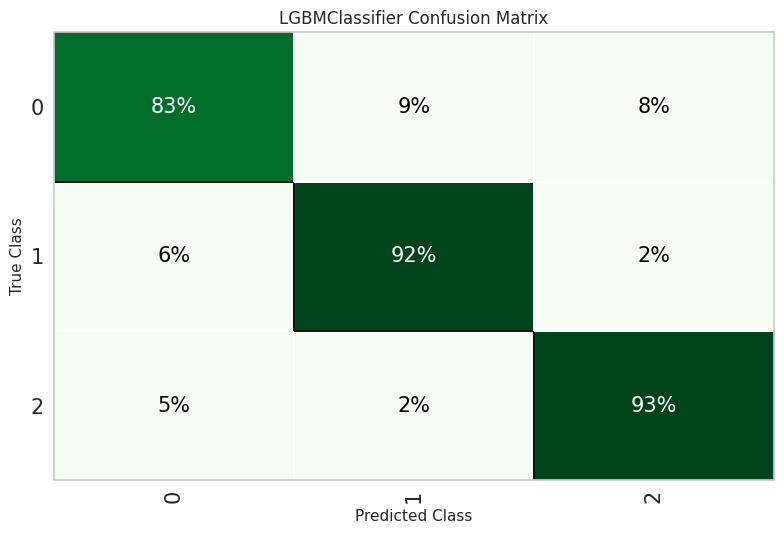

In [41]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix', plot_kwargs = {'percent': True})

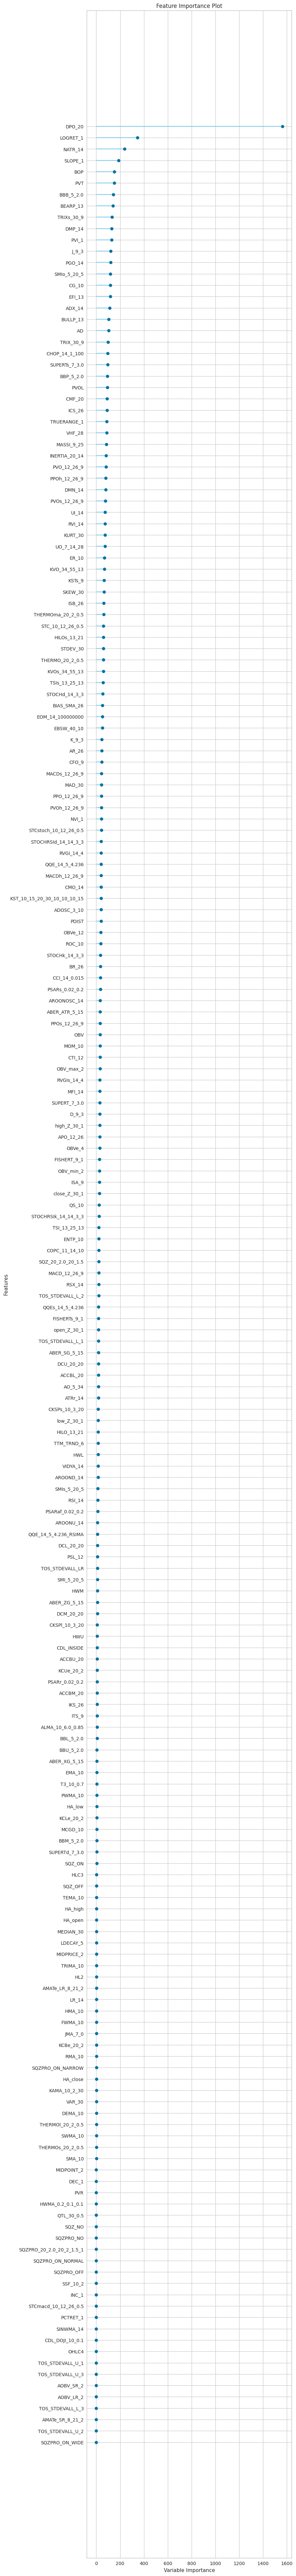

In [31]:
# plot AUC
plot_model(best, plot = 'feature_all')

In [42]:
# save pipeline
model_name = 'ETHUSDT-15m-12-3'
save_model(best, f'../../models/{model_name}')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ABER_ZG_5_15', 'ABER_SG_5_15',
                                              'ABER_XG_5_15', 'ABER_ATR_5_15',
                                              'ACCBL_20', 'ACCBM_20', 'ACCBU_20',
                                              'AD', 'ADOSC_3_10', 'ADX_14',
                                              'DMP_14'...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_samples=20, min_child_weight=0.00

In [43]:
# load pipeline
from pycaret.classification import *
import pandas as pd

model_name = 'ETHUSDT-15m-12-3'
loaded_best_pipeline = load_model(f'../../models/{model_name}')

Transformation Pipeline and Model Successfully Loaded


In [46]:
# create api
data = pd.read_csv('../../data/dataset.csv')
s = setup(data, target = 'signal', session_id = 123, use_gpu=True)
create_api(loaded_best_pipeline, 'loaded_best_pipeline_api')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1


[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


,Description,Value
0,Session id,123
1,Target,signal
2,Target type,Multiclass
3,Target mapping,"dont_trade: 0, long: 1, short: 2"
4,Original data shape,"(20009, 206)"
5,Transformed data shape,"(20009, 206)"
6,Transformed train set shape,"(14006, 206)"
7,Transformed test set shape,"(6003, 206)"
8,Numeric features,205
9,Rows with missing values,75.8%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDAP=1


API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python loaded_best_pipeline_api.py


In [47]:
!python3 loaded_best_pipeline_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [37636]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:52930 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:52930 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:52916 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:52916 - "GET /favicon.ico HTTP/1.1" 404 Not Found
^C
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [37636]


In [57]:
tst_df = pd.read_csv('../../data/dataset.csv')[-1000:]
# orig_sigs = data[-100:]
# tst_df = tst_df.drop(columns = ['signal'], axis=1)
tst_df.tail()

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,TRUERANGE_1,TSI_13_25_13,TSIs_13_25_13,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,VHF_28,VIDYA_14,signal
28904,1677.882667,1681.733462,1674.031872,3.850795,1663.321219,1673.3880,1682.528719,7.097969e+07,16308.576466,25.668303,...,11.21,24.394060,12.529912,1,0.164314,65.973780,17.516970,0.428019,1673.969160,dont_trade
28905,1679.946000,1683.887409,1676.004591,3.941409,1664.362552,1674.1910,1683.120052,7.096298e+07,14271.801417,27.446806,...,5.21,27.439167,14.659806,1,0.104722,60.829753,21.839569,0.414482,1674.828163,dont_trade
28906,1684.693333,1689.110749,1680.275918,4.417416,1667.526778,1679.1830,1690.069278,7.096096e+07,2492.654299,31.099373,...,2.48,24.402283,23.222823,-1,0.275997,49.775350,48.063625,0.445636,1677.808022,dont_trade
28907,1682.104000,1686.189511,1678.018489,4.085511,1669.985260,1680.6825,1691.320260,7.095404e+07,-777.056634,29.487077,...,3.87,19.125205,22.285821,-1,0.384306,45.955477,45.624910,0.437863,1678.084529,dont_trade
28908,1680.432667,1684.169081,1676.696253,3.736414,1672.948130,1682.7910,1693.003130,7.094044e+07,-5124.880250,21.373530,...,5.05,6.168867,13.009172,-1,0.489529,47.232470,17.834490,0.284798,1678.543869,dont_trade


In [58]:
predictions = predict_model(loaded_best_pipeline, data=tst_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9340,0.9562,0.9340,0.9342,0.9307,0.7823,0.7902


In [59]:
predictions

,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,ACCBM_20,ACCBU_20,AD,ADOSC_3_10,ADX_14,...,TSIs_13_25_13,TTM_TRND_6,UI_14,UO_7_14_28,VAR_30,VHF_28,VIDYA_14,signal,prediction_label,prediction_score
27909,1874.602661,1881.357666,1867.847656,6.754976,1839.862061,1857.603027,1874.927124,62933940.0,-3360.762939,43.134930,...,37.112881,-1,0.118443,43.229420,253.105591,0.572115,1862.292480,2,dont_trade,0.9891
27910,1873.592651,1880.293335,1866.891968,6.700644,1840.892822,1859.151489,1876.790283,62971992.0,975.314270,42.757927,...,38.710938,-1,0.153077,49.479870,259.906860,0.581866,1862.823486,2,dont_trade,0.9800
27911,1873.236694,1879.729980,1866.743408,6.493268,1842.423462,1860.674561,1878.433472,62974520.0,3464.983887,42.612278,...,39.818630,-1,0.169492,48.938835,266.797943,0.578071,1863.445557,2,dont_trade,0.9863
27912,1871.790039,1878.126343,1865.453613,6.336384,1843.958374,1862.202026,1879.950928,62963244.0,580.854187,42.021889,...,40.331722,-1,0.201481,46.932323,266.595764,0.572587,1863.756226,2,dont_trade,0.9794
27913,1871.401978,1877.896606,1864.907349,6.494625,1844.837769,1863.943970,1882.410278,62990440.0,8001.579590,42.032921,...,40.639488,1,0.202846,49.089756,272.581940,0.539368,1864.460205,2,dont_trade,0.8881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28904,1677.882690,1681.733521,1674.031860,3.850795,1663.321167,1673.387939,1682.528687,70979688.0,16308.576172,25.668303,...,12.529912,1,0.164314,65.973778,17.516970,0.428019,1673.969116,0,dont_trade,0.8398
28905,1679.946045,1683.887451,1676.004639,3.941409,1664.362549,1674.191040,1683.119995,70962976.0,14271.801758,27.446806,...,14.659806,1,0.104722,60.829754,21.839569,0.414482,1674.828125,0,dont_trade,0.9790
28906,1684.693359,1689.110718,1680.275879,4.417416,1667.526733,1679.182983,1690.069336,70960960.0,2492.654297,31.099373,...,23.222822,-1,0.275997,49.775349,48.063625,0.445636,1677.807983,0,dont_trade,0.9873
28907,1682.104004,1686.189453,1678.018433,4.085511,1669.985229,1680.682495,1691.320312,70954032.0,-777.056641,29.487078,...,22.285820,-1,0.384306,45.955479,45.624908,0.437863,1678.084473,0,dont_trade,0.9812


In [61]:
predictions['correct_signal'] = list(tst_df['signal'])
predictions.to_csv(f'../../data/predictions.csv', index=False)

In [79]:
d=tst_df.to_dict('records')
# orig_sig =  d.pop('signal')
d[0]

{'ABER_ZG_5_15': 1874.6026666666664,
 'ABER_SG_5_15': 1881.357643051924,
 'ABER_XG_5_15': 1867.8476902814089,
 'ABER_ATR_5_15': 6.7549763852579146,
 'ACCBL_20': 1839.862080409417,
 'ACCBM_20': 1857.603,
 'ACCBU_20': 1874.9270804094167,
 'AD': 62933941.15375214,
 'ADOSC_3_10': -3360.762867122889,
 'ADX_14': 43.13492825717356,
 'DMP_14': 2.436505189814992,
 'DMN_14': 0.7152501211976335,
 'ALMA_10_6.0_0.85': 1869.251601002274,
 'AMATe_LR_8_21_2': 1,
 'AMATe_SR_8_21_2': 0,
 'AO_5_34': 25.487882352941146,
 'OBV': 2232018.84399998,
 'OBV_min_2': 2232018.84399998,
 'OBV_max_2': 2283627.75399998,
 'OBVe_4': 2234941.728275689,
 'OBVe_12': 2157963.179709487,
 'AOBV_LR_2': 1,
 'AOBV_SR_2': 0,
 'APO_12_26': 15.221987179487089,
 'AROOND_14': 0.0,
 'AROONU_14': 57.14285714285714,
 'AROONOSC_14': 57.14285714285714,
 'ATRr_14': 6.885112287157966,
 'BBL_5_2.0': 1869.9526943866003,
 'BBM_5_2.0': 1874.034,
 'BBU_5_2.0': 1878.1153056134,
 'BBB_5_2.0': 0.4355636678309746,
 'BBP_5_2.0': 0.0670503100285778,


In [75]:
len(d)

1000

In [82]:
import requests

d=tst_df.to_dict('records')

for i in range(5):
    orignal_signal = d[i].pop('signal')
    json=d[i]
    url = 'http://localhost:8000/predict'
    r = requests.post(url, json=json)
    print('r', r)

InvalidJSONError: Out of range float values are not JSON compliant